<a href="https://colab.research.google.com/github/fivetop/romee/blob/main/TF_2_x_CNN_Example_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


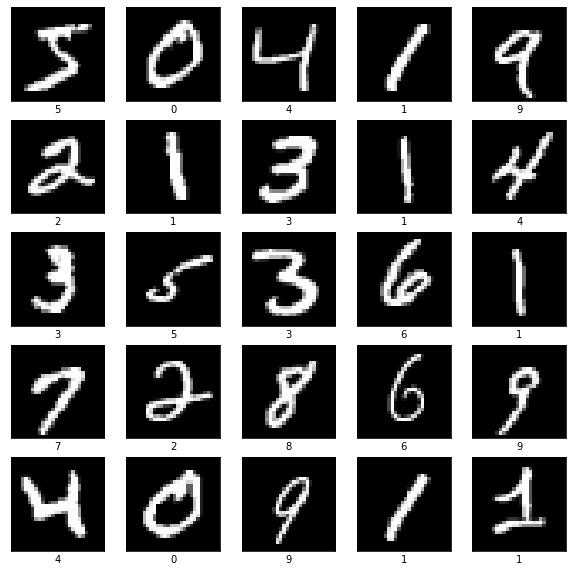

In [ ]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [ ]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Conv2D(kernel_size=5, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 14s 4ms/step - loss: 0.2227 - accuracy: 0.9294 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 2/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.0373 - val_accuracy: 0.9877
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0320 - val_accuracy: 0.9902
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0275 - val_accuracy: 0.9902
Epoch 5/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0262 - val_accuracy: 0.9913
Epoch 6/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0285 - val_accuracy: 0.9890
Epoch 7/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0220 - val_accuracy

In [ ]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0184 - accuracy: 0.9937


[0.0184303130954504, 0.9937000274658203]

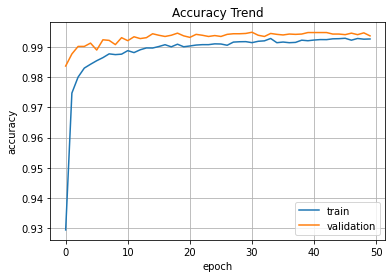

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

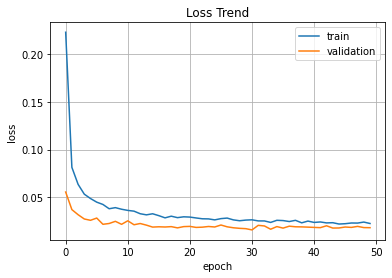

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [ ]:

# index_label_prediction 코드 구현

ret_val = model.predict(x_test.reshape(-1,28,28,1))

print('type(ret_val) = ', type(ret_val), ', ret_val.shape = ', ret_val.shape)

# predict 실행 결과는 softmax 에 의한 확률 결과이므로, argmax 이용해서 10진수로 바꾸어 주어야함

predicted_val = np.argmax(ret_val, axis=1)  # 행 단위로 argmax 실행

prediction_label_comp_val = np.equal(predicted_val, t_test) # 결과가 정답이란 같은가? True or Flase 로 리턴 

# list comprehension 이용하여 index_label_prediction 구현

index_label_prediction_list = [ [index, t_test[index], predicted_val[index] ]  for index, result in enumerate(prediction_label_comp_val)  if result == False ]

print(len(index_label_prediction_list))

print('Accuracy = ', 1 - ( len(index_label_prediction_list) / len(t_test) ))

313/313 [==============================] - 1s 3ms/step
type(ret_val) =  <class 'numpy.ndarray'> , ret_val.shape =  (10000, 10)
63
Accuracy =  0.9937


In [ ]:
print(index_label_prediction_list)

[[321, 2, 7], [659, 2, 7], [674, 5, 3], [938, 3, 5], [947, 8, 9], [1014, 6, 8], [1112, 4, 6], [1232, 9, 4], [1242, 4, 9], [1247, 9, 5], [1260, 7, 1], [1393, 5, 3], [1709, 9, 5], [1737, 5, 3], [1790, 2, 7], [1878, 8, 3], [1901, 9, 4], [2035, 5, 3], [2129, 9, 8], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2293, 9, 4], [2462, 2, 0], [2597, 5, 3], [2654, 6, 1], [2896, 8, 0], [2939, 9, 5], [3225, 7, 9], [3422, 6, 0], [3520, 6, 4], [3558, 5, 0], [3808, 7, 8], [3853, 6, 0], [3985, 9, 4], [4078, 9, 8], [4176, 2, 7], [4289, 2, 8], [4384, 2, 1], [4571, 6, 0], [4740, 3, 5], [4761, 9, 8], [4807, 8, 0], [4823, 9, 4], [4860, 4, 9], [5654, 7, 2], [5937, 5, 3], [5955, 3, 8], [5997, 5, 9], [6555, 8, 9], [6571, 9, 7], [6576, 7, 1], [6597, 0, 7], [6625, 8, 4], [7216, 0, 6], [8408, 8, 5], [9587, 9, 4], [9642, 9, 7], [9664, 2, 7], [9669, 4, 7], [9729, 5, 6], [9839, 2, 7], [9850, 0, 6]]


63


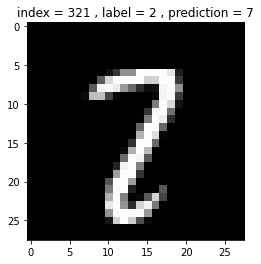

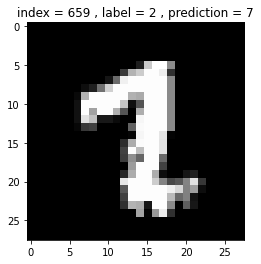

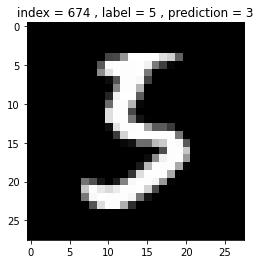

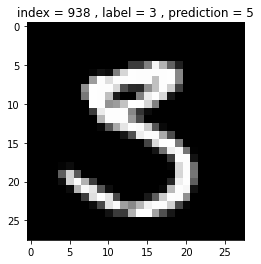

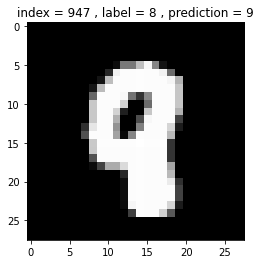

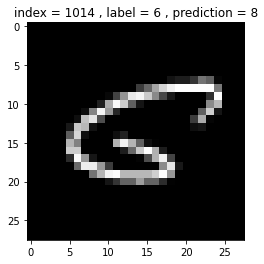

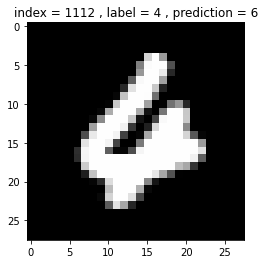

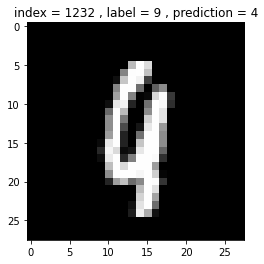

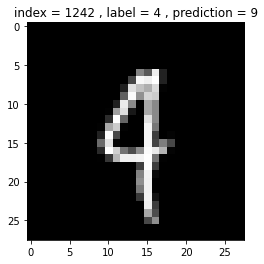

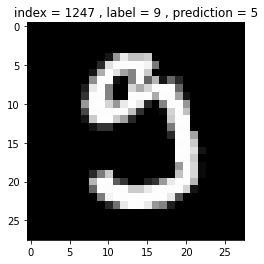

In [ ]:
# 데이터 출력

#plt.figure(figsize=(150, 150))
cnt = len(index_label_prediction_list)

print(cnt)

for index in range(10):

    mnist_index = index_label_prediction_list[index][0]
    label = index_label_prediction_list[index][1]
    prediction = index_label_prediction_list[index][2]

    title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

    img = x_test[mnist_index].reshape(28,28)

    #plt.subplot(150 , 1, index+1)
    plt.title(title_str)
    plt.imshow(img, cmap='gray')
    plt.show()